# Computer vision Introduction using CNN 
# (Convolutional Neural Network)
* CNN should have non linear activations
* tf.keras.layers.ConvXD where X:
  - 1 = 1D text based
  - 2 = 2D Images
  - 3 = 3D Videos


## Imports

In [1]:
import pathlib
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import zipfile
import os 

## Lets now get the data
We will only be using the pizza and steak part of the food101 dataset

In [2]:
# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

--2021-11-04 12:48:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   147MB/s    in 0.7s    

2021-11-04 12:48:11 (147 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [3]:
# Time to unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

In [4]:
# View files
!ls pizza_steak

test  train


In [5]:
!ls pizza_steak/train/

pizza  steak


## Visualizing the Data

In [6]:
# Lets traverse through pizza steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  #print(f" There are {len(dirnames)} Directories and {len(filenames)} images in {dirpath}.")
  if len(dirnames) < 1:
    print(f"There are {len(filenames)} images in {dirpath}.")
  elif  len(filenames) <= 1:
    print(f"There are {len(dirnames)} Directories in {dirpath}.")

There are 2 Directories in pizza_steak.
There are 2 Directories in pizza_steak/test.
There are 250 images in pizza_steak/test/steak.
There are 250 images in pizza_steak/test/pizza.
There are 2 Directories in pizza_steak/train.
There are 750 images in pizza_steak/train/steak.
There are 750 images in pizza_steak/train/pizza.


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [8]:
num_pizza_images_test = len(os.listdir("pizza_steak/test/pizza"))
num_pizza_images_test

250

In [9]:
# Lets get the classnames 
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))

class_names = class_names[1:]
class_names

array(['pizza', 'steak'], dtype='<U9')

### Visualize our images

In [10]:
def view_random_image(target_dir,target_class):
  """
  INFO:Gets a random image from a selected directory and class
  """
  target_folder = target_dir + "/" +  target_class
  random_image = random.sample(os.listdir(target_folder),1)
  # Plot out the image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f" Image shape: {img.shape}") # Shows the shape of the image

  return img

 Image shape: (512, 512, 3)


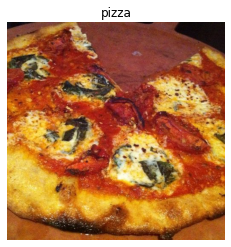

In [11]:
# View a random image
img = view_random_image(target_dir = "pizza_steak/train",
                        target_class = "pizza")

## Lets try to slowly build a CNN (convoluted neural network)

In [12]:
# Set up random seed
tf.random.set_seed(42)

# Preprocces data (get all images between 0 and 1 , callded normalization or scaling )
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32,
                                               seed = 42)


test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             batch_size = 32,
                                             seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
# Build a CNN model same as Tiny VGG on the cnn explainer site

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding = "valid"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1 ,activation= "sigmoid")
])

In [14]:
# TIme to compile our model
model_1.compile(optimizer= tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps =  len(test_data))

Epoch 1/5
47/47 [==============================] - 43s 255ms/step - loss: 0.5609 - accuracy: 0.7207 - val_loss: 0.4829 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 11s 234ms/step - loss: 0.4229 - accuracy: 0.8060 - val_loss: 0.3430 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4223 - accuracy: 0.8207 - val_loss: 0.3647 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 11s 231ms/step - loss: 0.3610 - accuracy: 0.8413 - val_loss: 0.3143 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 11s 236ms/step - loss: 0.3326 - accuracy: 0.8560 - val_loss: 0.2953 - val_accuracy: 0.8840


In [15]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 162ms/step - loss: 0.2953 - accuracy: 0.8840


[0.29534727334976196, 0.8840000033378601]

In [16]:
model_1.evaluate(train_data)

47/47 [==============================] - 8s 165ms/step - loss: 0.2849 - accuracy: 0.8980


[0.2849147617816925, 0.8980000019073486]

In [17]:
# Setup random seed
tf.random.set_seed(42)

# Create model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid"),

])

# COmpile the model
model_2.compile(optimizer= tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ["accuracy"])


# Fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps =  len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 210ms/step - loss: 0.8880 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [18]:
model_2.evaluate(test_data)

16/16 [==============================] - 2s 150ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931489109992981, 0.5]

In [19]:
model_2.evaluate(train_data)

47/47 [==============================] - 7s 153ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931490302085876, 0.5]

### Lets try to improve model 2 by adding an extra layer and more hidden connections


In [20]:
# Model 3

# Setup random seed
tf.random.set_seed(42)

# Build model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(126,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(64,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])


# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 214ms/step - loss: 4.4903 - accuracy: 0.6060 - val_loss: 3.5242 - val_accuracy: 0.5080
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 1.5361 - accuracy: 0.6760 - val_loss: 1.0887 - val_accuracy: 0.6760
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.8161 - accuracy: 0.7373 - val_loss: 0.4874 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6552 - accuracy: 0.7507 - val_loss: 0.5366 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6165 - accuracy: 0.7407 - val_loss: 0.4586 - val_accuracy: 0.7980


In [21]:
model_3.evaluate(test_data)

16/16 [==============================] - 2s 149ms/step - loss: 0.4586 - accuracy: 0.7980


[0.4586421847343445, 0.7979999780654907]

In [22]:
model_3.evaluate(train_data)

47/47 [==============================] - 7s 151ms/step - loss: 0.4132 - accuracy: 0.8340


[0.4131861925125122, 0.8339999914169312]

## Lets view our model summaries

In [23]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [24]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 126)               18966654  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               12700     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 18,985,883
Trainable params: 18,985,883
Non-trainable params: 0
_________________________________________________________________


## Notice how the model 1 (CNN) only has 31k parameters while model 3 has over 18m parameters and yet it still not delivers the same performance.

# Steps we took

1. Become one with the data (visualize it)
2. Preprocess the data, prepare it for model training (scaling/normalizing and turning into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different hyperparameters and improve our model 
7. Repeat until satisfied 

## 1.  Become one with the data

 Image shape: (512, 512, 3)
 Image shape: (512, 512, 3)


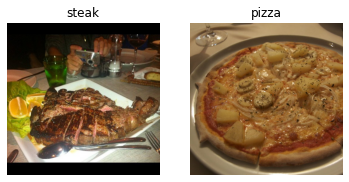

In [26]:
# Visualize Data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train","pizza")

## 2. Preporcess the data

In [27]:
# Define directory dataset paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

In [28]:
# Turn data into batches using test data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [29]:
# Load in our image data from directories 
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode ="binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [30]:
# Get a sample of a train data batch
images,labels = train_data.next() # Get the net batch of images / labels in train data
len(images),len(labels)

(32, 32)

In [31]:
# View the first batch of labels
labels

array([1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.],
      dtype=float32)

## 3. Create a CNN model

start with a baseline. A baseline is a simple model or an existing one that you set up when beginning a machine learning experiment and then as you keep experimenting you try to beat

In [32]:
# Lets try to make the model creating a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential


# Create the baseline model

baseline_model = Sequential([        
      Conv2D(filters = 10,
             kernel_size = 3,
             strides = 1,
             padding = "valid",
             activation="relu",
             input_shape = (224,224,3)), # Specify shape in input layer
      Conv2D(10,3,activation="relu"),
      Conv2D(10,3,activation="relu"),
      Flatten(),
      Dense(1,activation="sigmoid")         # Output layer
])

## 4. Fit the model

In [33]:
# Compile the baseline model
baseline_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the baseline model
history_4 = baseline_model.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps =  len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 248ms/step - loss: 1.3190 - accuracy: 0.6580 - val_loss: 0.4226 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4447 - accuracy: 0.8073 - val_loss: 0.3831 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3347 - accuracy: 0.8693 - val_loss: 0.3928 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 11s 234ms/step - loss: 0.2078 - accuracy: 0.9233 - val_loss: 0.4270 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 11s 236ms/step - loss: 0.0828 - accuracy: 0.9760 - val_loss: 0.4813 - val_accuracy: 0.8200


In [34]:
baseline_model.evaluate(test_data)

16/16 [==============================] - 3s 163ms/step - loss: 0.4813 - accuracy: 0.8200


[0.4813064634799957, 0.8199999928474426]

In [35]:
baseline_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## 5. Evaluate the model
Lets try to evaluate our base line model

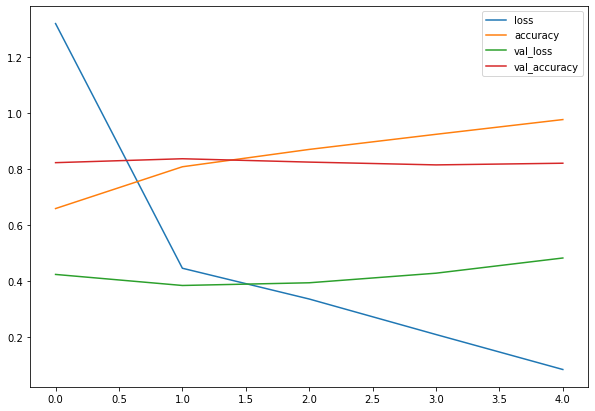

In [36]:
# Plot the training curves 
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [37]:
# Lets try to plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation methods
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs,loss,label = "training loss")
  plt.plot(epochs,val_loss,label = "validation loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label = "training accuracy")
  plt.plot(epochs,val_accuracy,label = "validation accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

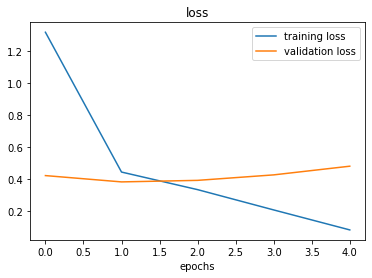

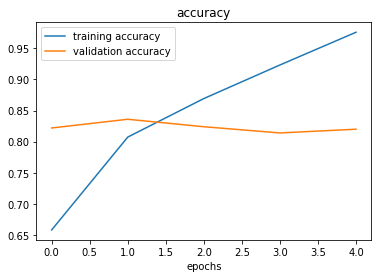

In [38]:
# Check out the loss and accuracy of model 4
plot_loss_curves(history_4)

## 6. Adjust different hyperparameters and improve our model 

Fitting a machine learning model comes in 3 steps:
0. Create the baseline model
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filterz
* Add another dense layer to the output of our flattened layer

Ways to reduce overfitting:
* Add data augmentation
* Add regularization layers(such as MaxPool)
* Add more data

In [39]:
# Create a new model
model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [40]:
# Compile te model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 221ms/step - loss: 0.5842 - accuracy: 0.6900 - val_loss: 0.4826 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4720 - accuracy: 0.7967 - val_loss: 0.3727 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4277 - accuracy: 0.8067 - val_loss: 0.3837 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3935 - accuracy: 0.8307 - val_loss: 0.3321 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3953 - accuracy: 0.8227 - val_loss: 0.3217 - val_accuracy: 0.8800


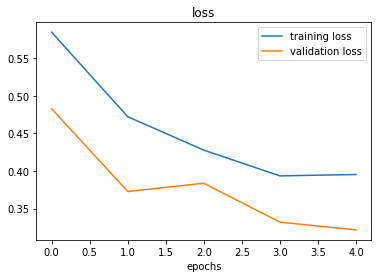

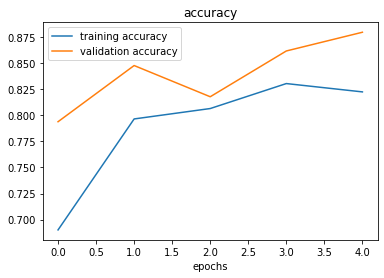

In [41]:
plot_loss_curves(history_5)

In [42]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

## Lets try and do some data augmentatio

In [43]:
# Create ImageDataGenerator training instance
train_datagen_augmented = ImageDataGenerator(rescale= 1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)
# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without data augmentation for test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [44]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = "binary")

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


### **Note** Data augmentation should be only done on training data

In [45]:
# Get sample augmented data batches
images , labels =  train_data.next()
augmented_images , augmented_labels  = train_data_augmented.next() 

Showing image number: 10


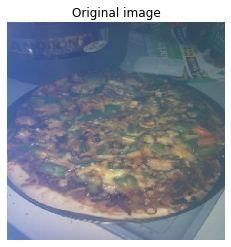

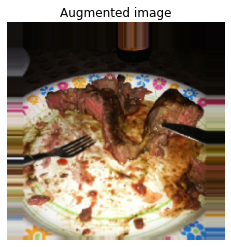

In [46]:
# Lets view some images

random_number = random.randint(0,31) # 32 batch sizes
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

## 7 Repeat until satisfied 
Time to train the new model on the augmented data

In [47]:
# Create a model 
model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# Compile model 
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs = 7,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/7
47/47 [==============================] - 26s 538ms/step - loss: 0.6635 - accuracy: 0.5807 - val_loss: 0.5508 - val_accuracy: 0.7500
Epoch 2/7
47/47 [==============================] - 25s 533ms/step - loss: 0.5378 - accuracy: 0.7320 - val_loss: 0.3869 - val_accuracy: 0.8340
Epoch 3/7
47/47 [==============================] - 25s 526ms/step - loss: 0.4918 - accuracy: 0.7653 - val_loss: 0.3748 - val_accuracy: 0.8280
Epoch 4/7
47/47 [==============================] - 25s 527ms/step - loss: 0.4749 - accuracy: 0.7713 - val_loss: 0.3780 - val_accuracy: 0.8380
Epoch 5/7
47/47 [==============================] - 25s 524ms/step - loss: 0.4696 - accuracy: 0.7693 - val_loss: 0.3757 - val_accuracy: 0.8400
Epoch 6/7
47/47 [==============================] - 25s 523ms/step - loss: 0.4713 - accuracy: 0.7800 - val_loss: 0.3931 - val_accuracy: 0.8200
Epoch 7/7
47/47 [==============================] - 25s 525ms/step - loss: 0.4602 - accuracy: 0.7907 - val_loss: 0.3885 - val_accuracy: 0.8300


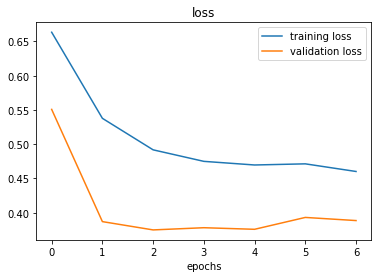

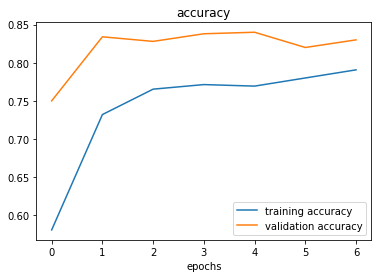

In [48]:
plot_loss_curves(history_6)

Lets try to make a model with an early stopping. As we can see from the above plots the model could definetly use a little more training time.

In [49]:
# Create model 
model_7 = Sequential([
    Conv2D(10,3,activation ="relu",input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# Compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Setup early callback
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience = 3)

# Finnaly fit the model
history_7 = model_7.fit(train_data_augmented,
                        epochs = 30,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = [callback])

Epoch 1/30
47/47 [==============================] - 25s 529ms/step - loss: 0.6470 - accuracy: 0.6007 - val_loss: 0.5588 - val_accuracy: 0.7220
Epoch 2/30
47/47 [==============================] - 25s 522ms/step - loss: 0.5942 - accuracy: 0.6827 - val_loss: 0.5370 - val_accuracy: 0.6960
Epoch 3/30
47/47 [==============================] - 25s 525ms/step - loss: 0.5400 - accuracy: 0.7220 - val_loss: 0.3955 - val_accuracy: 0.8600
Epoch 4/30
47/47 [==============================] - 25s 528ms/step - loss: 0.4960 - accuracy: 0.7647 - val_loss: 0.4027 - val_accuracy: 0.8160
Epoch 5/30
47/47 [==============================] - 25s 527ms/step - loss: 0.4565 - accuracy: 0.7940 - val_loss: 0.4076 - val_accuracy: 0.8140
Epoch 6/30
47/47 [==============================] - 25s 526ms/step - loss: 0.4435 - accuracy: 0.8047 - val_loss: 0.3312 - val_accuracy: 0.8620
Epoch 7/30
47/47 [==============================] - 25s 527ms/step - loss: 0.4765 - accuracy: 0.7720 - val_loss: 0.3384 - val_accuracy: 0.8520

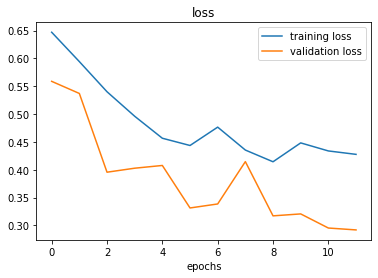

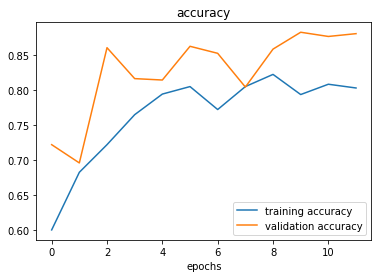

In [50]:
plot_loss_curves(history_7)

Lets create a Cnn model with a lot more filters on each layer. Additionaly put a kernel regularizer on the first 2 Conv2d layers.

In [57]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Create model
model_8 = Sequential([
    Conv2D(64,(3,3),kernel_regularizer=tf.keras.regularizers.l1(0.01),activation="relu",input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(32,(3,3),kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4),activation="relu"),
    MaxPool2D(),
    Conv2D(16,(3,3),activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# Compile the model
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Set up callback
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience = 5)

# Fit the model on the augmented data
history_8 = model_8.fit(train_data_augmented,
                        epochs = 50,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = [callback])

Epoch 1/50
47/47 [==============================] - 27s 567ms/step - loss: 1.2376 - accuracy: 0.6120 - val_loss: 0.8855 - val_accuracy: 0.7600
Epoch 2/50
47/47 [==============================] - 26s 558ms/step - loss: 0.7707 - accuracy: 0.7080 - val_loss: 0.5582 - val_accuracy: 0.7900
Epoch 3/50
47/47 [==============================] - 26s 557ms/step - loss: 0.6311 - accuracy: 0.7320 - val_loss: 0.4807 - val_accuracy: 0.8500
Epoch 4/50
47/47 [==============================] - 26s 555ms/step - loss: 0.5721 - accuracy: 0.7500 - val_loss: 0.4398 - val_accuracy: 0.8340
Epoch 5/50
47/47 [==============================] - 26s 556ms/step - loss: 0.5756 - accuracy: 0.7473 - val_loss: 0.6010 - val_accuracy: 0.6600
Epoch 6/50
47/47 [==============================] - 26s 554ms/step - loss: 0.5567 - accuracy: 0.7520 - val_loss: 0.4518 - val_accuracy: 0.8480
Epoch 7/50
47/47 [==============================] - 26s 562ms/step - loss: 0.5390 - accuracy: 0.7640 - val_loss: 0.4318 - val_accuracy: 0.8360

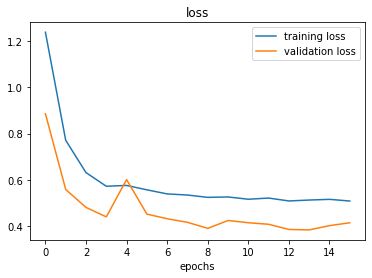

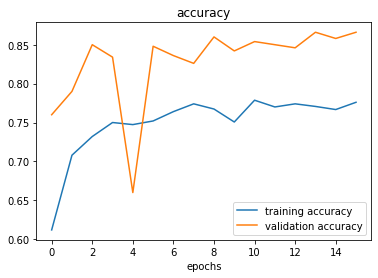

In [58]:
plot_loss_curves(history_8)